# LIMPIEZA I 15/8

HIPÓTESIS:

1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

2. El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

3. Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

4. Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

TAREAS:

In [6]:
import pandas as pd

In [16]:
df = pd.read_csv("data/bank_additional_full.csv", index_col = 0)
df.head(2)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [17]:
pd.options.display.max_columns = None
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43170 entries, 0 to 29612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43170 non-null  int64  
 1   job             42823 non-null  object 
 2   marital         43085 non-null  object 
 3   education       41355 non-null  object 
 4   default         34154 non-null  float64
 5   housing         42139 non-null  float64
 6   loan            42139 non-null  float64
 7   contact         43170 non-null  object 
 8   duration        43170 non-null  int64  
 9   campaign        43170 non-null  int64  
 10  pdays           43170 non-null  int64  
 11  previous        43170 non-null  int64  
 12  poutcome        43170 non-null  object 
 13  emp.var.rate    43170 non-null  float64
 14  cons.price.idx  43170 non-null  object 
 15  cons.conf.idx   43170 non-null  object 
 16  euribor3m       43170 non-null  object 
 17  nr.employed     43170 non-null  obje

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43170.0,40.014918,10.407327,17.0,32.0,38.0,47.0,98.0
default,34154.0,0.000088,0.009372,0.0,0.0,0.0,0.0,1.0
housing,42139.0,0.535869,0.498718,0.0,0.0,1.0,1.0,1.0
loan,42139.0,0.155652,0.362529,0.0,0.0,0.0,0.0,1.0
duration,43170.0,257.883739,259.393738,0.0,102.0,179.0,319.0,4918.0
campaign,43170.0,2.564675,2.768538,1.0,1.0,2.0,3.0,56.0
pdays,43170.0,962.452282,186.962379,0.0,999.0,999.0,999.0,999.0
previous,43170.0,0.173639,0.496750,0.0,0.0,0.0,0.0,7.0
emp.var.rate,43170.0,0.078177,1.572217,-3.4,-1.8,1.1,1.4,1.4


2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.

In [20]:
nuevas_columnas = {col: col.replace(".", ",") for col in df.columns}
nuevas_columnas

{'age': 'age',
 'job': 'job',
 'marital': 'marital',
 'education': 'education',
 'default': 'default',
 'housing': 'housing',
 'loan': 'loan',
 'contact': 'contact',
 'duration': 'duration',
 'campaign': 'campaign',
 'pdays': 'pdays',
 'previous': 'previous',
 'poutcome': 'poutcome',
 'emp.var.rate': 'emp,var,rate',
 'cons.price.idx': 'cons,price,idx',
 'cons.conf.idx': 'cons,conf,idx',
 'euribor3m': 'euribor3m',
 'nr.employed': 'nr,employed',
 'y': 'y',
 'month_day_week': 'month_day_week'}

In [26]:
df.rename(columns = nuevas_columnas, inplace = True)
df.head(8)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
5,45,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
6,59,admin.,MARRIED,professional.course,0.0,0.0,0.0,telephone,139,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
7,41,blue-collar,MARRIED,NaN,NaN,0.0,0.0,telephone,217,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [27]:
df["poutcome"].value_counts()

poutcome
NONEXISTENT    37261
FAILURE         4472
SUCCESS         1437
Name: count, dtype: int64

In [28]:
df["contact"].value_counts()

contact
cellular     27438
telephone    15732
Name: count, dtype: int64

In [29]:
df["pdays"].value_counts()

pdays
999    41581
3        458
6        428
4        121
9         67
7         66
2         63
12        61
10        55
5         50
13        38
11        30
1         26
15        26
14        22
8         20
0         15
16        13
17        10
18         7
22         4
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.

In [25]:
df.duplicated().sum()

1994

In [35]:
df.drop_duplicates(inplace = True)

In [36]:
df.duplicated().sum()

0

4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [33]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [38]:
df[["cons,price,idx", 'cons,conf,idx', 'euribor3m', 'nr,employed']] = df[["cons,price,idx", 'cons,conf,idx', 'euribor3m', 'nr,employed']].replace(r',', ".", regex=True)

In [39]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [43]:
df = df.astype({"cons,price,idx":'float64', "cons,conf,idx": 'float64', "euribor3m":'float64', "nr,employed": 'float64'}, copy=True, errors ='raise')

In [44]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
y                  object
month_day_week     object
dtype: object

5. En las columnas de marital y month, poner todos los valores en minúsculas.
💡 Pista Podréis usar una función o una lambda 💡

In [46]:
df['marital'] = df['marital'].str.lower()
df['month_day_week'] = df['month_day_week'].str.lower()

In [47]:
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
4651,32,blue-collar,divorced,basic.9y,0.0,0.0,0.0,telephone,129,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.858,5191.0,no,"['may', 'wed']"
2177,34,self-employed,married,university.degree,0.0,1.0,1.0,telephone,86,4,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,"['may', 'mon']"
17939,35,services,married,high.school,0.0,1.0,0.0,cellular,110,3,999,0,NONEXISTENT,1.4,93.918,-42.7,4.961,5228.1,no,"['jul', 'tue']"


6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:

- Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.

In [48]:
df["y"].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

TypeError: 'value' must be an instance of str or bytes, not a float

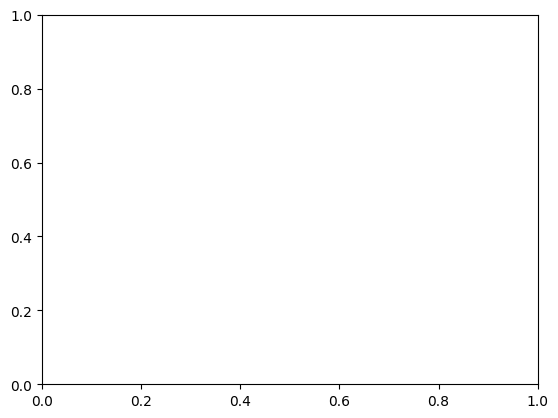

In [53]:
#barplot job - y


plt.bar(df['job'], df['y'])

# iniciamos nuestra gráfica para contestar a la pregunta, añadiendo sex al parámetro hue


# cambiamos el nombre de los ejes
fig.set(xlabel='job', ylabel= 'y' )

# cambiamos el título de la gráfica
fig.set_title('Relación tipo de trabajo vs. oferta')

# motramos la gráfica
plt.show()

- Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.

In [ ]:
#barplot - housing -y

- Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.

In [ ]:
#barplot - loan -y

- Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta

In [ ]:
# pdays - y

- Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.

In [ ]:
# campaign - y

7. Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza